In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('telco-churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 where tenure is 0 and total charges 0

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ", "0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df.duplicated().sum()

0

In [21]:
df["customerID"].duplicated().sum()

0

#convert value of 0 and 1 to yes/no to make it easier to understand

In [49]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


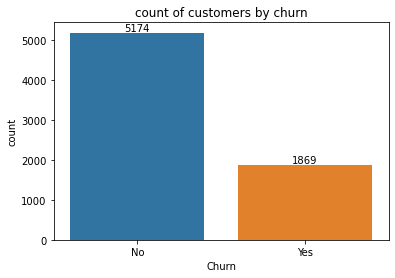

In [51]:
ax=sns.countplot(x='Churn', data=df)

ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show()

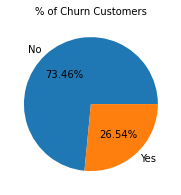

,Churn
Churn,
No,5174
Yes,1869


In [52]:
plt.figure(figsize=(3,4))

gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("% of Churn Customers", fontsize=10)
plt.show()
gb

#from the given pie chart we can conclude that 26.54% of our customers have churned out
#lets find the reason behind it

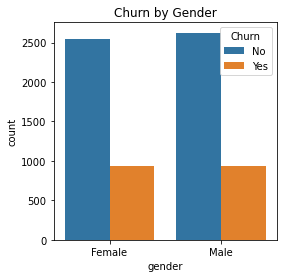

In [53]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

#equal churn by both female and male

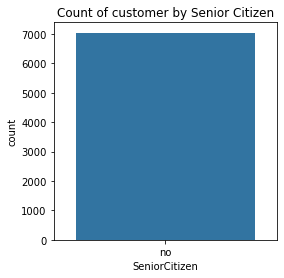

In [61]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", data=df)
plt.title("Count of customer by Senior Citizen")
plt.show()

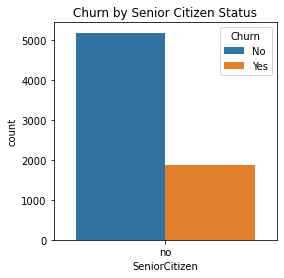

In [55]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
plt.title("Churn by Senior Citizen Status")
plt.show()

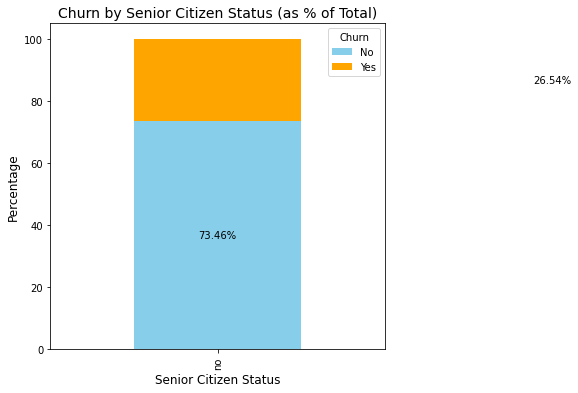

In [59]:
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100  # normalize by index to get % per category

# Step 2: Plot the stacked bar chart
senior_churn.plot(kind='bar', stacked=True, figsize=(6,6), color=['skyblue', 'orange'])

# Step 3: Add title and labels
plt.title('Churn by Senior Citizen Status (as % of Total)', fontsize=14)
plt.xlabel('Senior Citizen Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Step 4: Add percentage labels on the bars
for idx, row in senior_churn.iterrows():
    for i, value in enumerate(row):
        plt.text(i, row[:i].sum() + (value / 2), f'{value:.2f}%', ha='center', va='center')

# Show the plot
plt.show()

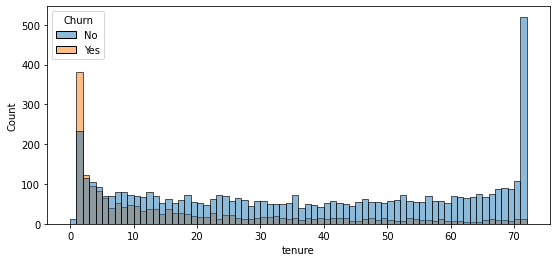

In [65]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

#people who have used have the services for a long time have stayed and people who used it for short time have churned out

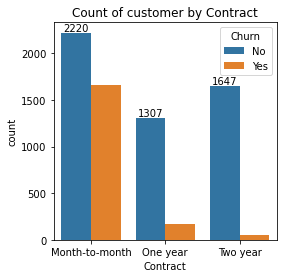

In [69]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Contract")
plt.show()

#people who have month to month contract are likely to churn then those who have 1 or 2 years of contract

In [71]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

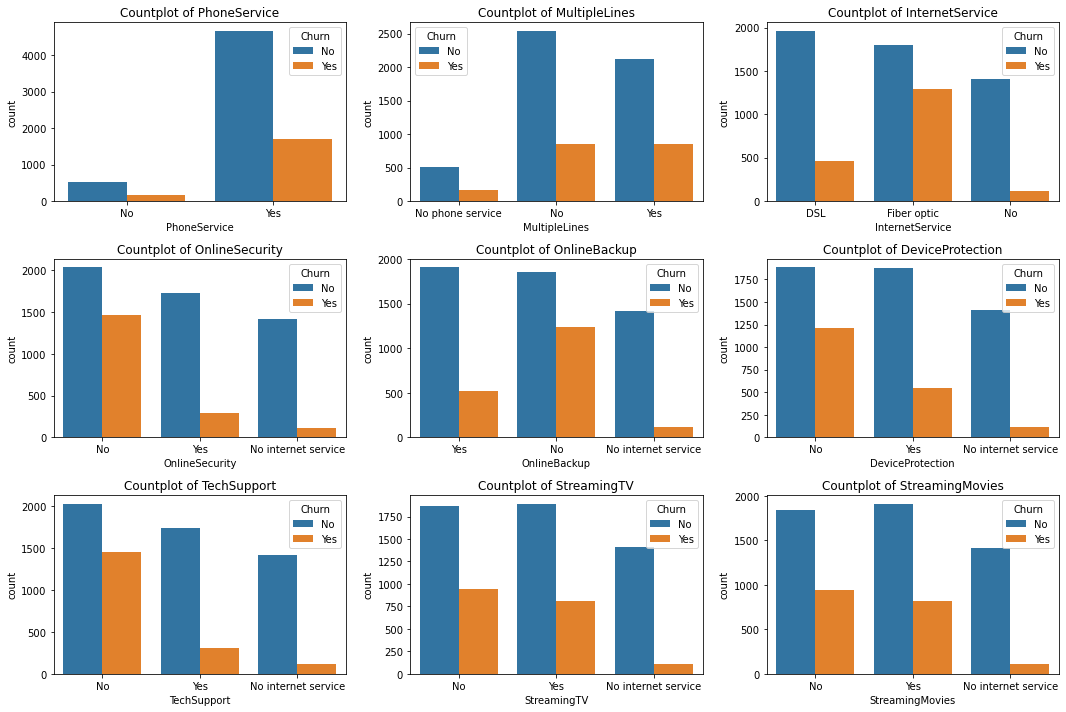

In [78]:
columns=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15,10))
rows=(len(columns)+cols-1)//cols
cols=3

for i, column in enumerate(columns,1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=column, hue="Churn")
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#The plots show how many customers used different services (like PhoneService, InternetService, and others) and whether they left the company (churned) or stayed. Most customers who stayed (blue bars) are larger in number across the services. However, more people seem to leave if they don’t have services like online security, tech support, or device protection. Also, customers using "Fiber optic" internet or having multiple lines appear more likely to leave compared to others.

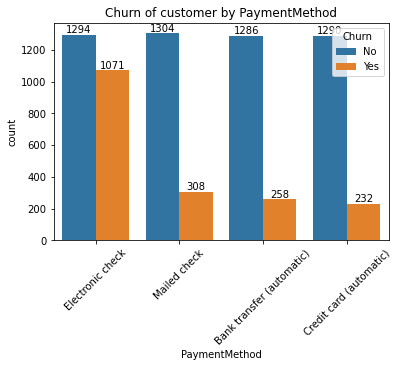

In [82]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churn of customer by PaymentMethod")
plt.show()